### Creating SQLite database from CSV file

In [11]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

csv_file_path = 'MostPopularShows.csv'

sqlite_db_path = 'Netflix.db'

df = pd.read_csv(csv_file_path)

conn = sqlite3.connect(sqlite_db_path)

df.to_sql('Netflix_Most_Popular_Shows', conn, if_exists='replace', index=False)

conn.close()

In [12]:
conn = sqlite3.connect(sqlite_db_path)

df = pd.read_sql_query("SELECT * FROM Netflix_Most_Popular_Shows", conn)

conn.close()

print(df)

     index                       TITLE  RELEASE_YEAR  SCORE  NUMBER_OF_VOTES  \
0        0                Breaking Bad          2008    9.5          1727694   
1        1  Avatar: The Last Airbender          2005    9.3           297336   
2        2                  Our Planet          2019    9.3            41386   
3        3                Kota Factory          2019    9.3            66985   
4        4              The Last Dance          2020    9.1           108321   
..     ...                         ...           ...    ...              ...   
241    241                 Evil Genius          2018    7.5            27516   
242    242              13 Reasons Why          2017    7.5           282373   
243    243                       Lupin          2021    7.5           100575   
244    244          All of Us Are Dead          2022    7.5            41393   
245    245     I Am Not Okay with This          2020    7.5            56459   

     DURATION  NUMBER_OF_SEASONS   MAIN

### Pandas Dataframe Cleaning

In [13]:
#Read SQLite file to Pandas Dataframe
pandas_netflix_df = pd.DataFrame(df)
pandas_netflix_df

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...,...
241,241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,243,Lupin,2021,7.5,100575,46,3,crime,FR
244,244,All of Us Are Dead,2022,7.5,41393,61,1,action,KR


In [14]:
#Remove the 'index' column, it is not needed as the pandas dataframe creates one automatically
pandas_netflix_df = pandas_netflix_df.drop(columns=['index'])
#rename columns to be more clear
columns_needing_renaming = {'TITLE': 'Title', 'RELEASE_YEAR': 'Year of Release', 'SCORE': 'IMDB Score', 'NUMBER_OF_VOTES': 'Number of Netflix Viewer/User Votes', 'DURATION': 'Duration of a Single Episode (in Minutes)', 'NUMBER_OF_SEASONS': 'Number of Released Seasons', 'MAIN_GENRE': 'Classification/Genre', 'MAIN_PRODUCTION': 'Country of Origin for Production'}
pandas_netflix_df.rename(columns=columns_needing_renaming, inplace=True)
pandas_netflix_df

,Title,Year of Release,IMDB Score,Number of Netflix Viewer/User Votes,Duration of a Single Episode (in Minutes),Number of Released Seasons,Classification/Genre,Country of Origin for Production
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...
241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,Lupin,2021,7.5,100575,46,3,crime,FR
244,All of Us Are Dead,2022,7.5,41393,61,1,action,KR


### Bar Graph Comparing Netflix Show Classifications/Genres and their corresponding IMDB Score

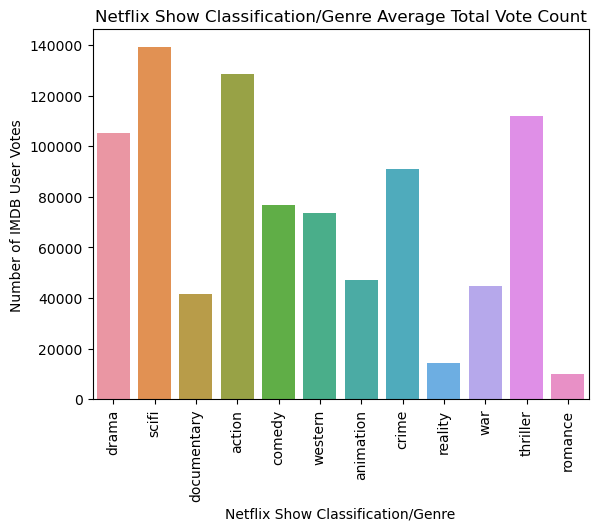

In [16]:
#Using Seasborn, create the barplot
sns.barplot(x='Classification/Genre', y='Number of Netflix Viewer/User Votes', data=pandas_netflix_df, errorbar=None)
# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Netflix Show Classification/Genre')
plt.ylabel('Number of IMDB User Votes')
plt.title('Netflix Show Classification/Genre Average Total Vote Count')
plt.show()

In [17]:
#Top ten Titles in Data set
pandas_netflix_df.head(10)

,Title,Year of Release,IMDB Score,Number of Netflix Viewer/User Votes,Duration of a Single Episode (in Minutes),Number of Released Seasons,Classification/Genre,Country of Origin for Production
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,The Last Dance,2020,9.1,108321,50,1,documentary,US
5,Arcane,2021,9.1,175412,41,1,action,US
6,Attack on Titan,2013,9.0,325381,24,4,scifi,JP
7,Hunter x Hunter,2011,9.0,87857,23,3,drama,JP
8,DEATH NOTE,2006,9.0,302147,24,1,scifi,JP
9,Seinfeld,1989,8.9,302700,24,9,comedy,US


### Pull Up the Statistics Regarding Your Show of Interest and Compare it to Other Titles

In [19]:
#Interactivety: Movie Demographic Information
# Create a text input widget for movie title
movie_title_input = widgets.Text(
    value='',
    placeholder='Enter Netflix title...',
    description='Netflix Show:',
    disabled=False
)

# Display the text input widget
display(movie_title_input)

# Define a function to display information about the specific movie
def display_movie_info(movie_title):
    # Filter the DataFrame based on the entered movie title
    movie = pandas_netflix_df[pandas_netflix_df['Title'] == movie_title]
    if not movie.empty:
        print("Netflix Title Information:")
        display(movie)
        
        plt.figure(figsize=(6, 6))
        ax = sns.barplot(x='Title', y='Number of Netflix Viewer/User Votes', data=movie, errorbar=None, capsize=0.2)
        plt.xticks(rotation=0)
        plt.xlabel('Netflix Show Title')
        plt.ylabel('Number of Netflix Viwer/User Votes')
        plt.title('Number of Netflix User Votes for {}'.format(movie_title))
        ax.set_ylim(0, 1800000)
        plt.show()
        
# Define a function to handle changes in the text input widget
def handle_text_change(change):
    display_movie_info(change.new)

# Attach the handle_text_change function to observe changes in the text input widget
movie_title_input.observe(handle_text_change, names='value')

Text(value='', description='Netflix Show:', placeholder='Enter Netflix title...')